In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv('all_predictions_final.csv')
data.dropna(inplace=True)
data['diff_takeaway'] = abs(data['takeaway']-data['takeaway_real'])
data['diff_delivery'] = abs(data['delivery']-data['delivery_real'])
data['diff_takeaway_web'] = abs(data['takeaway_web']-data['takeaway_web_real'])
data['diff_deliveroo_sales'] = abs(data['deliveroo_sales']-data['deliveroo_sales_real'])
data['diff_total_sales'] = abs(data['all_sales']-data['all_sales_real'])
#data = data[['Difference takeaway', 'Difference delivery', 'Difference takeaway_web', 'Difference deliveroo_sales', 'Difference all_sales']]
data.head()

,takeaway,delivery,takeaway_web,deliveroo_sales,all_sales,Regions,takeaway_real,delivery_real,takeaway_web_real,newCasesByPublishDate,...,Difference takeaway,Difference delivery,Difference takeaway_web,Difference deliveroo_sales,Difference all_sales,diff_takeaway,diff_delivery,diff_takeaway_web,diff_deliveroo_sales,diff_total_sales
0,3612.199362,4046.166643,3470.571884,4937.998214,15858.044846,Colchester,3091.46,4085.41,2849.71,11.0,...,16.844448,-0.960573,21.786844,3.050578,7.015905,520.739362,39.243357,620.861884,146.178214,1039.644846
1,3680.586749,4108.211437,3528.398134,5014.493629,16123.061239,Colchester,3530.83,3865.16,2883.25,18.0,...,4.241404,6.288263,22.375726,5.050994,7.111257,149.756749,243.051437,645.148134,241.103629,1070.431239
2,5043.502150,5376.462179,4861.316706,6592.221535,21658.377533,Colchester,4804.64,6167.72,4583.16,16.0,...,4.971489,-12.829017,6.069103,-9.641752,-5.219831,238.862150,791.257821,278.156706,703.428465,1192.792467
3,5483.899549,5508.150499,5242.745000,6683.189587,22703.752207,Colchester,6429.01,5387.74,6086.75,12.0,...,-14.700715,2.234898,-13.866267,4.672125,-6.524222,945.110451,120.410499,844.005000,298.309587,1584.627793
4,4207.537679,5097.805220,4039.237581,6250.727202,19378.034044,Colchester,6010.28,6707.27,5845.22,11.0,...,-29.994315,-23.995825,-30.896740,-22.803462,-27.314010,1802.742321,1609.464780,1805.982419,1846.432798,7281.895956


### Actuals vs predictions

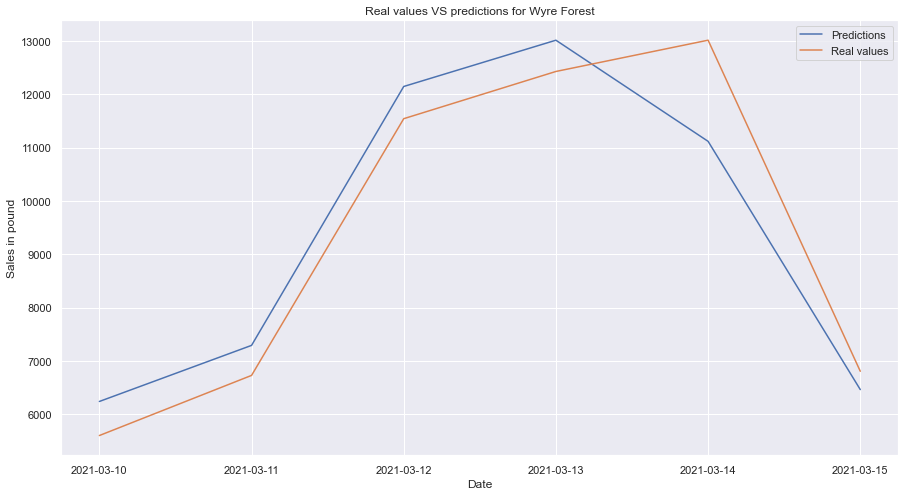

In [21]:
region = 'Wyre Forest'
plt.figure(figsize=(15, 8))
data.date = pd.to_datetime(data.date)
plt.plot(data[data['areaName']==region].date, data[data['areaName']==region].all_sales, label='Predictions')
plt.plot(data[data['areaName']==region].date, data[data['areaName']==region]['all_sales_real'], label='Actuals')
plt.title(f'Acuals vs Predictions for {region}')
plt.xlabel('Date')
plt.ylabel('Sales in pound')
plt.legend()

<AxesSubplot:title={'center':'Take Away'}, ylabel='Frequency'>

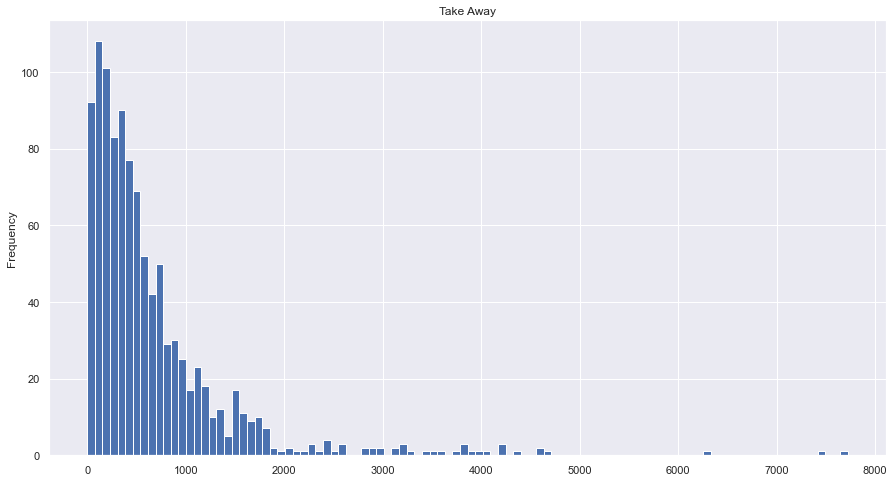

In [4]:
data['Difference takeaway'].plot.hist(bins=100, figsize=(15, 8), title='Take Away')

In [5]:
data['Difference takeaway'].describe()

count    1038.000000
mean      658.818077
std       787.453472
min         0.064289
25%       191.444376
50%       431.854757
75%       806.330617
max      7724.869606
Name: Difference takeaway, dtype: float64

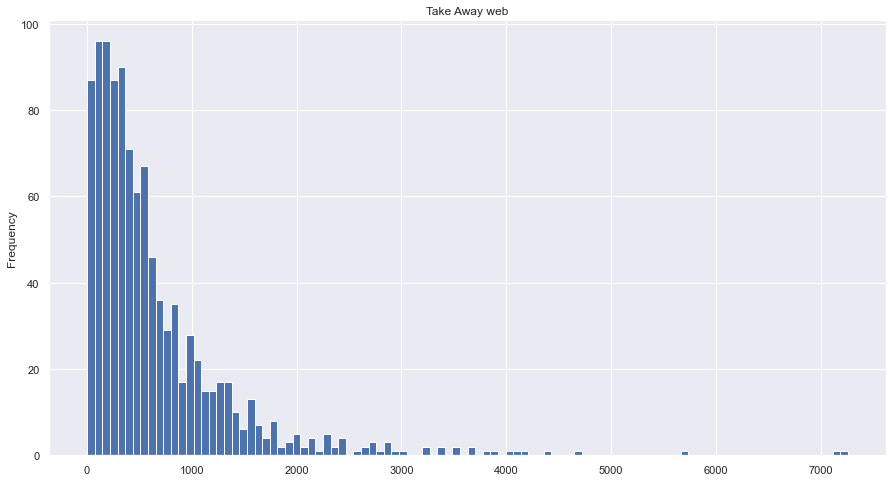

In [43]:
data['Difference takeaway_web'].plot.hist(bins=100, figsize=(15, 8), title='Take Away web')

In [6]:
data['Difference takeaway_web'].describe()

count    1038.000000
mean      647.567925
std       739.558428
min         0.633364
25%       201.527466
50%       428.010352
75%       822.299796
max      7262.738678
Name: Difference takeaway_web, dtype: float64

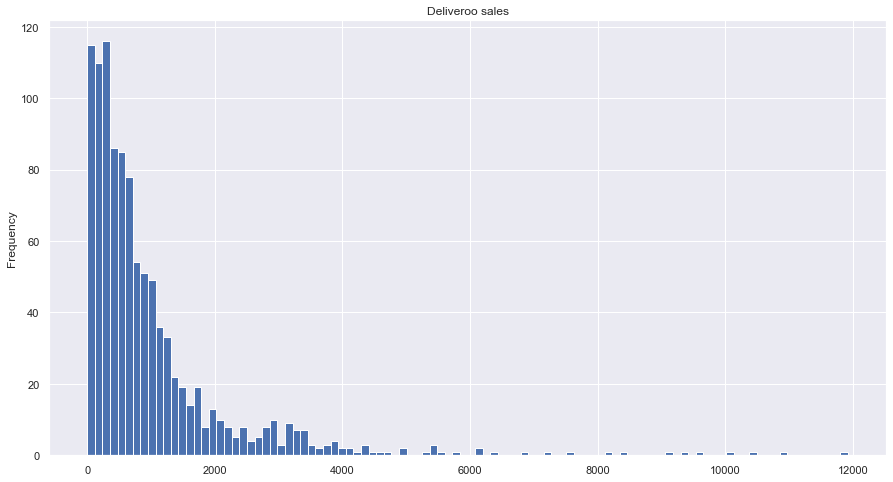

In [44]:
data['Difference deliveroo_sales'].plot.hist(bins=100, figsize=(15, 8), title='Deliveroo sales')

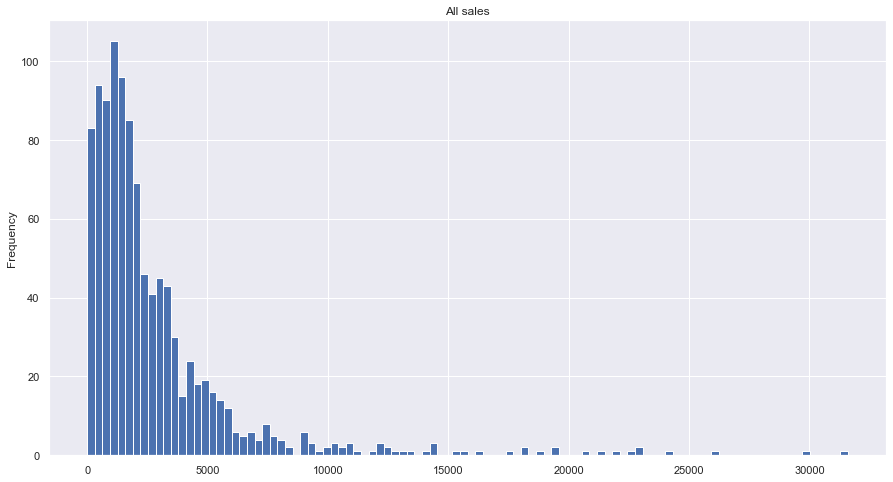

In [45]:
data['Difference all_sales'].plot.hist(bins=100, figsize=(15, 8), title='All sales')

In [47]:
data[data['Difference all_sales']>10000].shape[0]/data.shape[0]

0.0394990366088632

In [51]:
data[['Difference takeaway', 'Difference delivery', 'Difference takeaway_web', 'Difference deliveroo_sales', 'Difference all_sales']].describe()

,Difference takeaway,Difference delivery,Difference takeaway_web,Difference deliveroo_sales,Difference all_sales
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,658.818077,803.981907,647.567925,1018.650371,2802.106799
std,787.453472,1031.855685,739.558428,1341.651330,3494.555316
min,0.064289,0.795215,0.633364,0.016086,0.158186
25%,191.444376,221.802734,201.527466,274.095027,922.159384
50%,431.854757,478.626893,428.010352,603.289255,1767.981473
75%,806.330617,945.936877,822.299796,1176.086442,3381.192861
max,7724.869606,10372.380931,7262.738678,11919.706156,31606.577102
